In [1]:
#Importing the libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import collections
from sklearn import metrics
from collections import Counter
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Mike-project/Understanding Community Smells Variability A Statistical Approach/Appendix/Data_R/file_analysis_OS.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   project                660 non-null    object 
 1   id.project             660 non-null    int64  
 2   range.date             660 non-null    object 
 3   devs                   660 non-null    int64  
 4   ml.only.devs           660 non-null    int64  
 5   code.only.devs         660 non-null    int64  
 6   ml.code.devs           660 non-null    int64  
 7   perc.ml.only.devs      660 non-null    float64
 8   perc.code.only.devs    660 non-null    float64
 9   perc.ml.code.devs      660 non-null    float64
 10  sponsored.devs         660 non-null    int64  
 11  ratio.sponsored        660 non-null    float64
 12  sponsored.core.devs    660 non-null    int64  
 13  ratio.sponsored.core   660 non-null    float64
 14  num.tz                 660 non-null    int64  
 15  core.g

***Dropping the unneccessary columns***

In [5]:
dataset.drop(columns=['project','id.project','range.date','org.silo'], inplace=True)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   devs                   660 non-null    int64  
 1   ml.only.devs           660 non-null    int64  
 2   code.only.devs         660 non-null    int64  
 3   ml.code.devs           660 non-null    int64  
 4   perc.ml.only.devs      660 non-null    float64
 5   perc.code.only.devs    660 non-null    float64
 6   perc.ml.code.devs      660 non-null    float64
 7   sponsored.devs         660 non-null    int64  
 8   ratio.sponsored        660 non-null    float64
 9   sponsored.core.devs    660 non-null    int64  
 10  ratio.sponsored.core   660 non-null    float64
 11  num.tz                 660 non-null    int64  
 12  core.global.devs       660 non-null    int64  
 13  core.mail.devs         660 non-null    int64  
 14  core.code.devs         660 non-null    int64  
 15  st.con

***Pearson Correlation***

In [14]:
corr=dataset.corr()
corr.to_csv("/content/drive/MyDrive/Mike-project/Pearson_Correlation.csv")
corr

,devs,ml.only.devs,code.only.devs,ml.code.devs,perc.ml.only.devs,perc.code.only.devs,perc.ml.code.devs,sponsored.devs,ratio.sponsored,sponsored.core.devs,...,global.mod,mail.mod,code.mod,density,mail.only.core.devs,code.only.core.devs,ml.code.core.devs,ratio.mail.only.core,ratio.code.only.core,ratio.ml.code.core
devs,1.000000,0.792171,0.740136,0.558969,-0.260544,0.276561,-0.034947,0.770225,0.079088,0.599121,...,0.311423,0.363934,0.477328,-0.515176,0.794621,0.657387,0.537003,-0.320170,0.389184,0.023344
ml.only.devs,0.792171,1.000000,0.214233,0.421064,0.184199,-0.138358,-0.067871,0.439530,-0.088824,0.460108,...,0.179391,0.306866,0.302258,-0.439315,0.977514,0.185452,0.412085,0.059824,-0.044052,-0.043261
code.only.devs,0.740136,0.214233,1.000000,0.200376,-0.548026,0.657443,-0.196084,0.702695,0.176965,0.388919,...,0.282508,0.281278,0.352133,-0.341005,0.247000,0.881576,0.207651,-0.503826,0.693794,-0.073571
ml.code.devs,0.558969,0.421064,0.200376,1.000000,-0.270627,-0.103908,0.597025,0.550912,0.149076,0.537187,...,0.222464,0.113390,0.495896,-0.312774,0.404727,0.211679,0.893958,-0.332364,0.081149,0.462030
perc.ml.only.devs,-0.260544,0.184199,-0.548026,-0.270627,1.000000,-0.805324,-0.280677,-0.494806,-0.553957,-0.270718,...,-0.136812,-0.119415,-0.384652,0.229338,0.163231,-0.468286,-0.266198,0.758666,-0.720278,-0.329176
perc.code.only.devs,0.276561,-0.138358,0.657443,-0.103908,-0.805324,1.000000,-0.342969,0.450515,0.470494,0.201366,...,0.150686,0.208778,0.247532,-0.327877,-0.115564,0.531079,-0.063251,-0.567758,0.794180,-0.099623
perc.ml.code.devs,-0.034947,-0.067871,-0.196084,0.597025,-0.280677,-0.342969,1.000000,0.054618,0.116006,0.102928,...,-0.027179,-0.148806,0.208727,0.167453,-0.071555,-0.117836,0.524189,-0.282900,-0.144510,0.682873
sponsored.devs,0.770225,0.439530,0.702695,0.550912,-0.494806,0.450515,0.054618,1.000000,0.486336,0.767739,...,0.376077,0.404643,0.522019,-0.472517,0.450772,0.687152,0.574820,-0.518886,0.567952,0.122999
ratio.sponsored,0.079088,-0.088824,0.176965,0.149076,-0.553957,0.470494,0.116006,0.486336,1.000000,0.365595,...,0.150410,0.224205,0.245004,-0.233633,-0.082890,0.163485,0.181552,-0.403142,0.378325,0.180914
sponsored.core.devs,0.599121,0.460108,0.388919,0.537187,-0.270718,0.201366,0.102928,0.767739,0.365595,1.000000,...,0.322449,0.303508,0.445634,-0.359342,0.455624,0.420718,0.569872,-0.364199,0.355004,0.145505


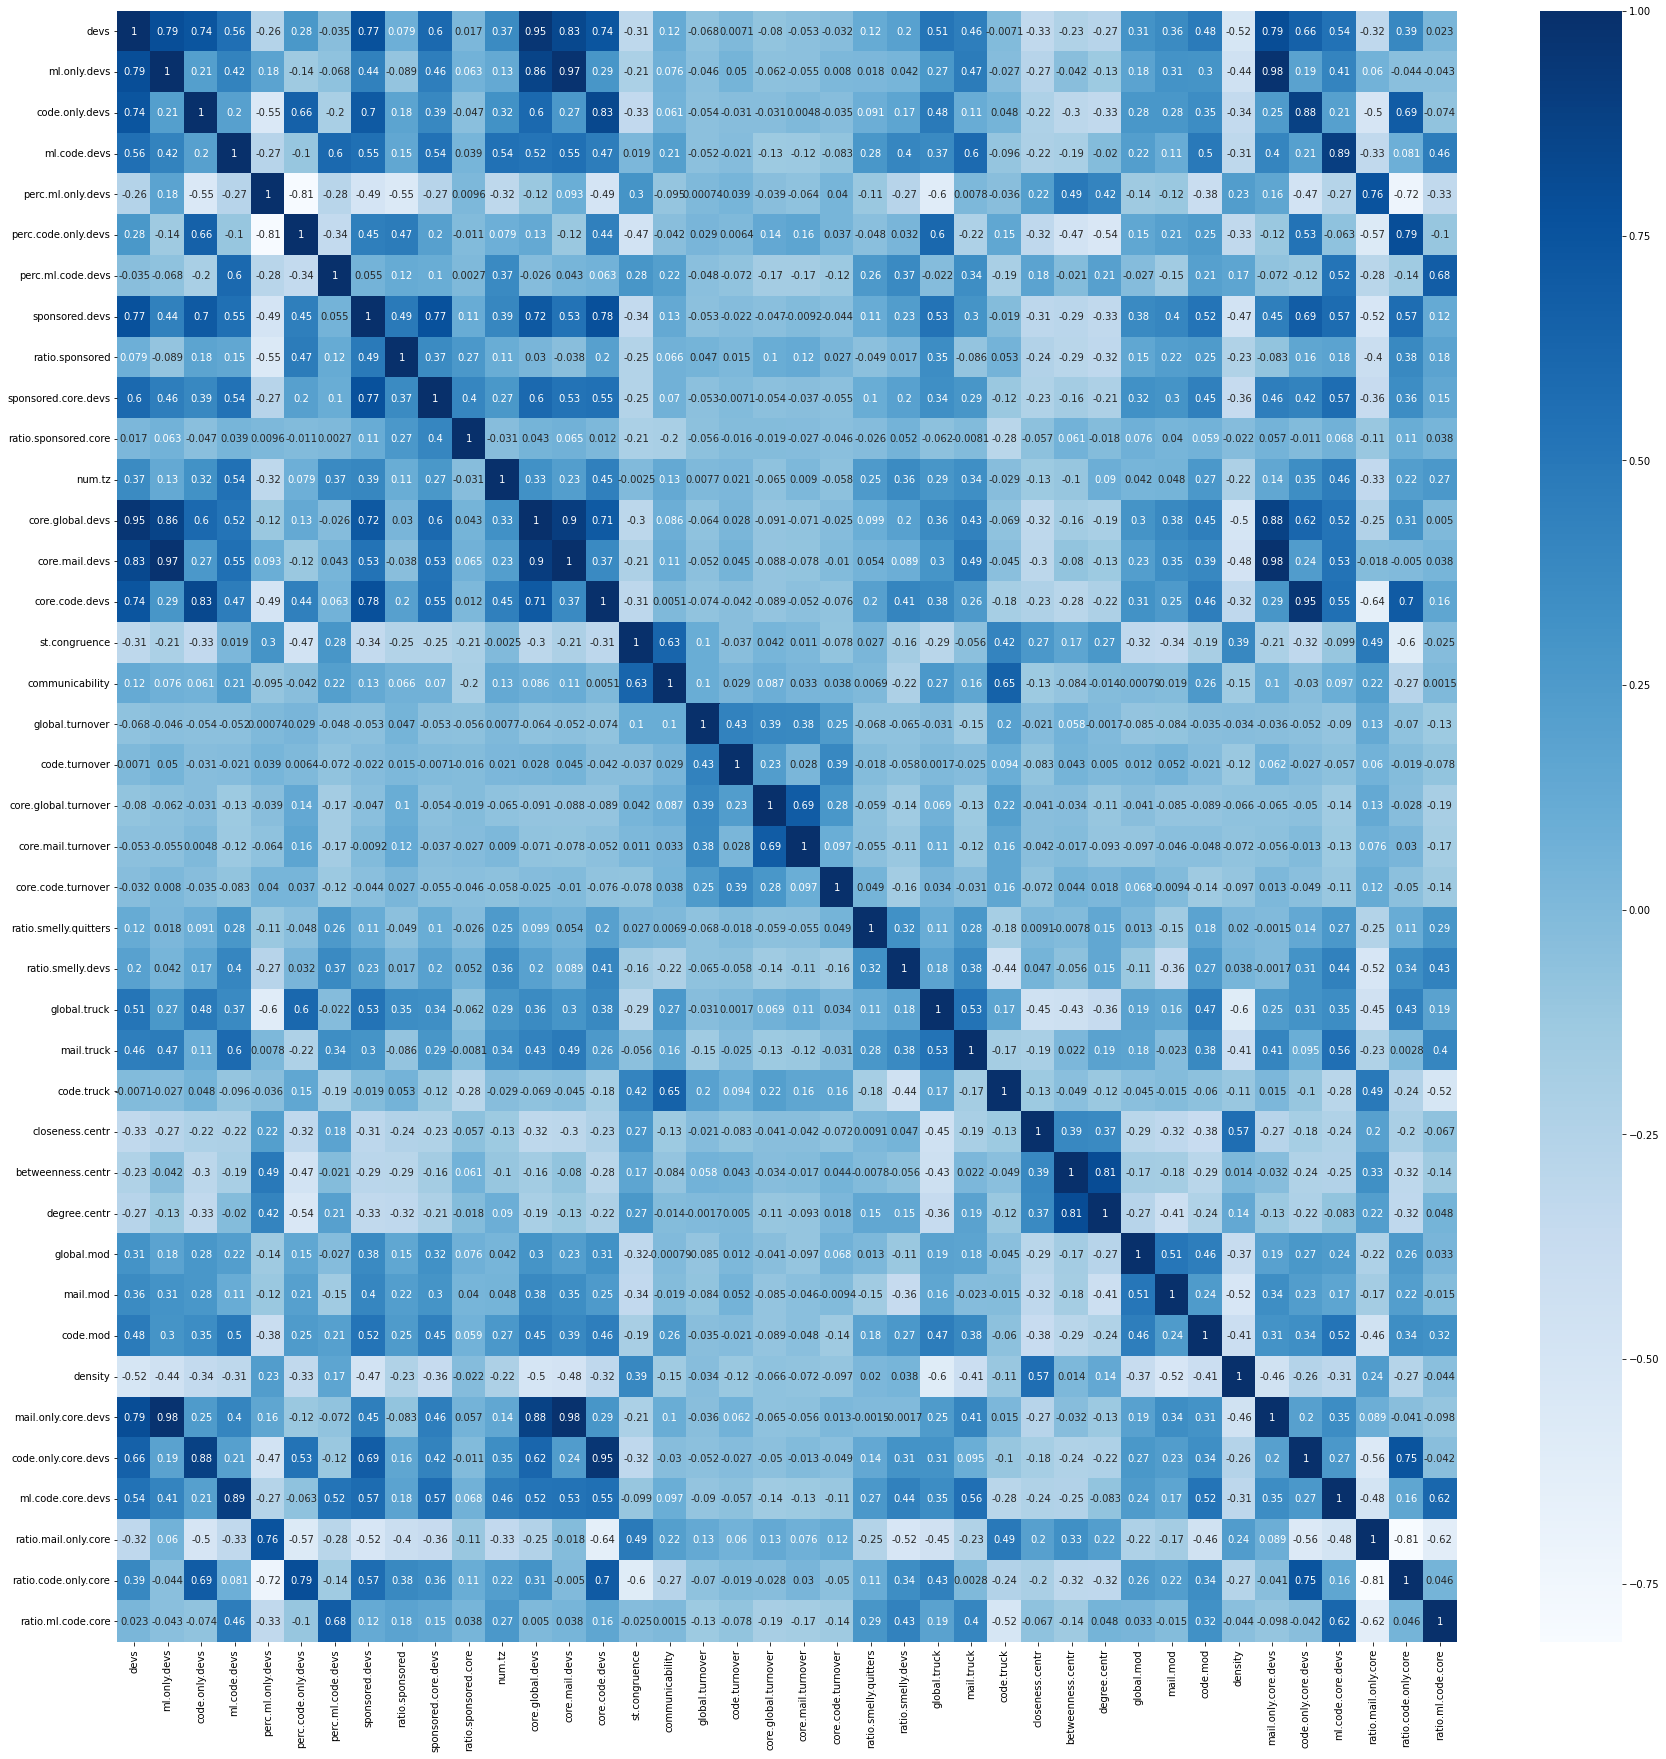

<Figure size 432x288 with 0 Axes>

In [15]:
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()
plt.savefig('/content/drive/MyDrive/Mike-project/Pearson_Correlation.jpg',dpi=150)

<Figure size 21600x21600 with 0 Axes>

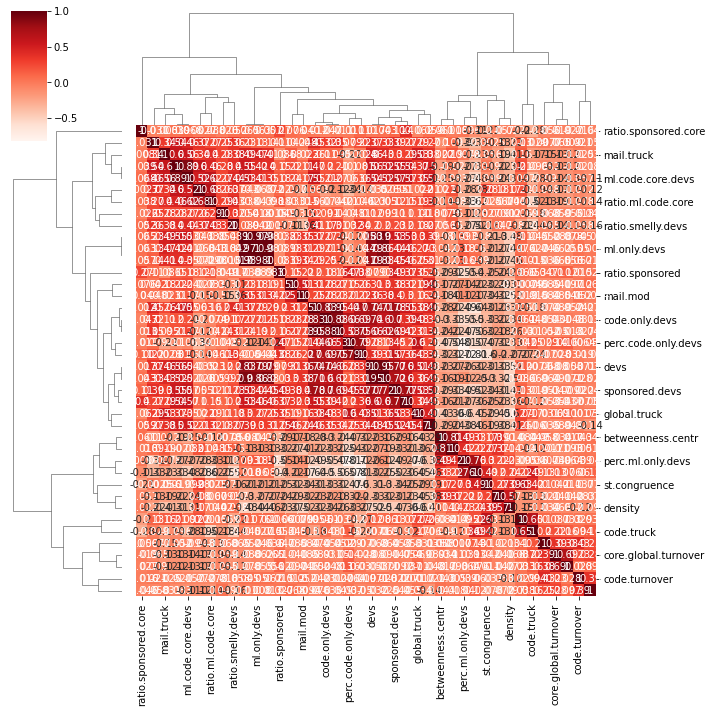

<Figure size 432x288 with 0 Axes>

In [16]:
#Using Pearson Correlation
plt.figure(figsize=(300,300))
cor = dataset.corr()
sns.clustermap(cor, annot=True, metric="correlation", cmap=plt.cm.Reds)
plt.show()
plt.savefig('/content/drive/MyDrive/Mike-project/Clustered_Heatmap.jpg',dpi=300)

***Making X and y i.e Input Data and Target Class***

In [18]:
#Making X and y
Input_variables=['devs','ml.only.devs','code.only.devs','ml.code.devs','perc.ml.only.devs','perc.code.only.devs','perc.ml.code.devs','sponsored.devs','ratio.sponsored','sponsored.core.devs','ratio.sponsored.core','num.tz','core.global.devs','core.mail.devs','core.code.devs','st.congruence','communicability','global.turnover','code.turnover','core.global.turnover','core.mail.turnover','core.code.turnover','ratio.smelly.quitters','ratio.smelly.devs','global.truck','mail.truck','code.truck','closeness.centr','betweenness.centr','degree.centr','global.mod','mail.mod','code.mod','density','mail.only.core.devs','code.only.core.devs','ml.code.core.devs','ratio.mail.only.core','ratio.code.only.core','ratio.ml.code.core']
X=dataset[Input_variables]
y= dataset.iloc[:,-1:]
y

,org.siloN
0,INCREASE
1,DECREASE
2,DECREASE
3,INCREASE
4,INCREASE
...,...
655,DECREASE
656,INCREASE
657,INCREASE
658,DECREASE


***Feature Scaling***

In [19]:
# perform a robust scaler transform of the dataset
from sklearn.preprocessing import StandardScaler
Scaling = StandardScaler()
Scaled_data = Scaling.fit_transform(X)
Scaled_data = pd.DataFrame(Scaled_data, columns=Input_variables, index = X.index)
Scaled_data

,devs,ml.only.devs,code.only.devs,ml.code.devs,perc.ml.only.devs,perc.code.only.devs,perc.ml.code.devs,sponsored.devs,ratio.sponsored,sponsored.core.devs,...,global.mod,mail.mod,code.mod,density,mail.only.core.devs,code.only.core.devs,ml.code.core.devs,ratio.mail.only.core,ratio.code.only.core,ratio.ml.code.core
0,5.215468,8.203594,0.690392,0.055465,1.350698,-0.658417,-1.074112,0.710768,-0.850895,0.271464,...,-0.215345,1.279062,0.093905,-1.034973,7.068185,0.757180,0.387014,0.762715,-0.347019,-0.843153
1,4.884766,6.654487,1.761495,-0.142053,0.808118,-0.101584,-1.116735,2.839253,-0.215336,1.110652,...,0.279636,1.698157,0.553952,-1.047483,7.068185,1.598333,-0.511481,0.603265,0.007354,-1.048315
2,4.165002,5.725023,1.468351,-0.174973,0.808626,-0.109532,-1.103868,1.214883,-0.603331,2.789027,...,0.663608,1.019497,0.702904,-1.043730,6.048054,1.738525,-0.383124,0.452702,0.170605,-1.011422
3,4.385470,5.824608,1.874243,-0.537089,0.705084,0.062833,-1.218870,1.606972,-0.506332,1.530246,...,0.260866,1.331712,0.534328,-1.052486,6.543546,1.411410,-0.511481,0.619471,-0.016536,-1.043816
4,3.302582,4.496802,1.310504,-0.438330,0.728939,0.007200,-1.166596,1.887036,-0.206650,4.467403,...,-0.114525,1.375938,0.349665,-1.033722,5.494268,1.504871,-0.254768,0.455316,0.137424,-0.969130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,0.475402,0.778946,0.216851,-0.537089,0.434048,0.227747,-1.056420,0.654755,0.412984,-0.567723,...,1.611205,1.263267,-0.274133,-0.976178,0.830811,-0.224166,-0.511481,0.875115,-0.491688,-0.839553
656,0.358683,0.657230,0.160478,-0.602929,0.467039,0.232715,-1.116735,0.150640,-0.089383,-0.567723,...,-0.273263,-0.331506,-1.960223,-0.974927,0.859957,-0.411089,-0.639837,1.254659,-0.881897,-0.963730
657,0.455949,0.612970,0.363423,-0.570009,0.128498,0.548137,-1.090196,-0.073411,-0.439736,-0.148129,...,1.956029,0.602508,1.647127,-0.986185,0.685078,0.102949,-0.383124,0.305276,0.146051,-0.723474
658,0.151184,0.214628,0.261951,-0.635848,-0.074526,0.773156,-1.133624,0.094628,0.045257,-0.148129,...,1.656788,-0.236736,1.040380,-0.982433,0.597638,-0.083974,-0.639837,0.661817,-0.132670,-0.959231


In [20]:
df = pd.DataFrame(Scaled_data)
df.to_csv(r'/content/drive/MyDrive/Mike-project/Scaled_data_OS.csv', index=False, header=True)
print(df)

         devs  ml.only.devs  code.only.devs  ml.code.devs  perc.ml.only.devs  \
0    5.215468      8.203594        0.690392      0.055465           1.350698   
1    4.884766      6.654487        1.761495     -0.142053           0.808118   
2    4.165002      5.725023        1.468351     -0.174973           0.808626   
3    4.385470      5.824608        1.874243     -0.537089           0.705084   
4    3.302582      4.496802        1.310504     -0.438330           0.728939   
..        ...           ...             ...           ...                ...   
655  0.475402      0.778946        0.216851     -0.537089           0.434048   
656  0.358683      0.657230        0.160478     -0.602929           0.467039   
657  0.455949      0.612970        0.363423     -0.570009           0.128498   
658  0.151184      0.214628        0.261951     -0.635848          -0.074526   
659  0.151184      0.314214        0.160478     -0.635848           0.197526   

     perc.code.only.devs  perc.ml.code.